<a href="https://colab.research.google.com/github/lups0208/datasciencecoursera/blob/master/Copia_de_3_Plantas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

Se provee de una base de datos de plantas (actualizada hasta 2018). Cada fila es una planta. Los datos son a nivel SEN. Incluye BC y BCS

In [3]:
plantas = pd.read_excel('https://github.com/IvanMGro/CENACE/raw/main/BDGPIIRCE.xlsx')

In [ ]:
plantas

Quiero conocer los combustibles utilizados en México

In [ ]:
plantas["Combustible"].unique()

Quiero conocer las tecnologías existentes en México


In [6]:
plantas["Tecnología"].unique()

array(['Ciclo Combinado', 'Geotérmica', 'Solar fotovoltaica', 'Turbogás',
       'Ciclo combinado', 'Termoeléctrica convencional',
       'Combustión Interna', 'Hidroeléctrica', 'Carboeléctrica', 'Eólica',
       'Nucleoeléctrica', 'Bioenergía', 'Termoeléctrica Convencional',
       'Cogeneración Eficiente', 'Combustión interna', 'Lecho Fluidizado'],
      dtype=object)

Para reemplazar una mala etiqueta podemos hacer uso del siguiente método. El primer argumento es la etiqueta mala y el segundo argumento es la etiqueta por la que quiero cambiar

In [7]:
plantas.replace("Ciclo Combinado","Ciclo combinado",inplace=True)
plantas.replace("Termoeléctrica Convencional","Termoeléctrica convencional",inplace=True)
plantas.replace("Combustión Interna","Combustión interna",inplace=True)

Quiero conocer la cantidad de MW Instalados por Tecnología en cada gerencia de control regional

In [8]:
plantas["Tecnología"].unique()

array(['Ciclo combinado', 'Geotérmica', 'Solar fotovoltaica', 'Turbogás',
       'Termoeléctrica convencional', 'Combustión interna',
       'Hidroeléctrica', 'Carboeléctrica', 'Eólica', 'Nucleoeléctrica',
       'Bioenergía', 'Cogeneración Eficiente', 'Lecho Fluidizado'],
      dtype=object)

Hacemos uso del método pivot para crear una tabla donde las filas sean las tecnologías y las columnas sean las gerencias de control regional. y los valores serán la columna con las suma

In [ ]:
tech_plantas = plantas.groupby(["Región de Control","Tecnología"])["Capacidad Firme (MW)"].sum().reset_index()
pd.options.display.max_rows = 999
tech_plantas


In [10]:
type(tech_plantas)

pandas.core.frame.DataFrame

Con esta función podemos ordenar nuestro dataframe de forma ascendente/descendete de acuerdo a los valores de una columna

In [ ]:
tech_pivot = tech_plantas.pivot(index="Tecnología",columns="Región de Control", values = "Capacidad Firme (MW)")
tech_pivot

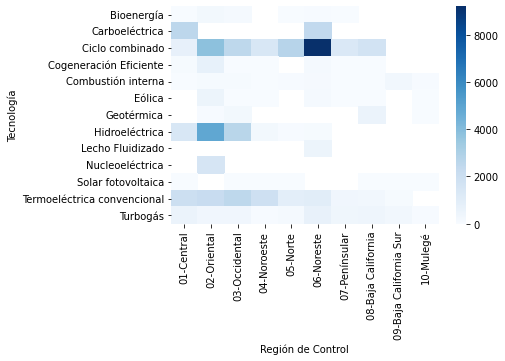

In [12]:
import seaborn as sns
sns.heatmap(tech_pivot, cmap="Blues")

In [ ]:
plantas.columns

In [ ]:
plantas.sort_values(by = "Régimen Térmico (GJ/MWh) 7/", ascending= False)

Obtenemos un dataframe con los datos de capacidad instalada firme de ciclo combinado por GCR

In [ ]:
ciclos = tech_plantas.loc[tech_plantas["Tecnología"]== "Ciclo combinado"]
ciclos

## Barplot

Quiero obtener una gráfica de barras (barchart) para conocer la capacidad firme de ciclo combinado existente en cada GCR

In [16]:
import matplotlib.pyplot as plt

In [ ]:
plt.bar(ciclos["Región de Control"], ciclos["Capacidad Firme (MW)"])
plt.xticks(rotation = 90)
plt.show

Obtenemos una gráfica de pastel (piechart) que refleje de igual manera la capacidad firme de ciclo combinado por GCR

In [ ]:
plt.pie(ciclos["Capacidad Firme (MW)"], labels = ciclos["Región de Control"])

# Plotly: Gráficos interactivas

In [ ]:
import plotly.express as px
px.pie(ciclos, values = "Capacidad Firme (MW)", names = "Región de Control", title = "Capacidad de Ciclo Combinado")

In [ ]:
px.bar(ciclos, x = "Capacidad Firme (MW)", y = "Región de Control")